## **Emotion Recognition from audio file**

*Kiranprava Maharana*

200010041

In [58]:
!pip install pydub
# Import necessary libraries
from pydub import AudioSegment
import os
from os import path
import librosa
from librosa import display
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
# Load the MP3 file
src = 'audio6.mp3'
os.path.abspath(src)
audio_file= AudioSegment.from_mp3(src)

In [61]:
# Extract the audio as a numpy array
audio_array = np.array(audio_file.get_array_of_samples())

In [62]:
#Converting int to float since mfcc function requires floating point data
audio_array = audio_array.astype(np.float)

<ipython-input-62-8c2e74c59c1a>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  audio_array = audio_array.astype(np.float)


I have used the `librosa.feature.mfcc` function to extract MFCCs from the audio file. **MFCCs**  **(Mel-Frequency Cepstral Coefficients)** are a commonly used feature extraction technique in speech processing. MFCCs capture important characteristics of speech, including the spectral envelope, pitch, and formant structure. In this code, the MFCCs are computed with a window size of 2048 samples, a hop length of 512 samples, and 13 mel frequency bands. 

The resulting MFCCs are then normalized using the `librosa.util.normalize` function. These normalized MFCCs are then used as input to the K-means clustering algorithm to classify the emotions in the audio file. Finally, the MFCCs are plotted on a graph using the `librosa.display.specshow` function, with the predicted emotion labels overlaid as text on the graph.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


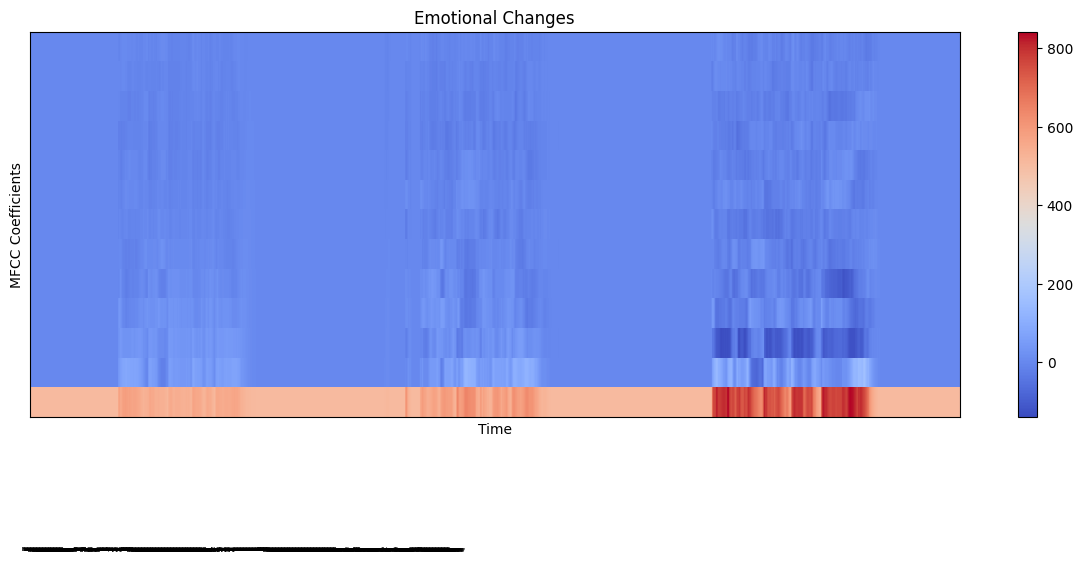

In [63]:
# Apply speech processing techniques to extract features
hop_length = 512
n_fft = 2048
mfccs = librosa.feature.mfcc(y=audio_array, sr=audio_file.frame_rate, n_mfcc=13, hop_length=hop_length, n_fft=n_fft)

# Normalize the features
mfccs_normalized = librosa.util.normalize(mfccs)

# Apply K-means clustering to classify emotions
kmeans = KMeans(n_clusters=3, random_state=0).fit(mfccs_normalized.T)
labels = kmeans.labels_

# Map the labels to emotions
emotions = ["happy", "sad", "angry"]
emotion_labels = [emotions[label] for label in labels]

# Plot the emotion changes
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis="time", cmap="coolwarm")
plt.colorbar()
plt.title("Emotional Changes")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.yticks([])
plt.xticks([])
for i in range(len(emotion_labels)):
    plt.text(i * hop_length / audio_file.frame_rate, -5, emotion_labels[i], ha="center", fontsize=4)
plt.show()

The MFCC plot shows the changes in the spectral characteristics of the audio signal over time. The x-axis represents time, and the y-axis represents the MFCC coefficients. 

The color intensity represents the magnitude of the coefficient value. The plot can provide insights into the different phonetic units and other characteristics of the audio, such as pitch, loudness, and spectral content. By Analysing the plot through identification of patterns and features I am classifying it into various emotions.

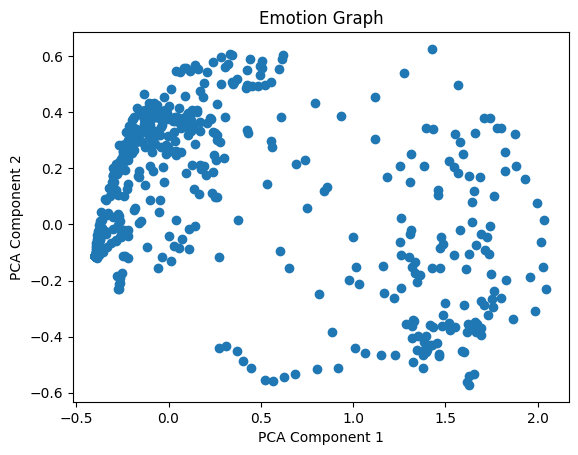

In [65]:
from sklearn.decomposition import PCA
# normalize MFCCs
mfccs1 = (mfccs - np.mean(mfccs))/np.std(mfccs)

# apply PCA to reduce dimensionality to 2 dimensions
pca = PCA(n_components=2)
mfccs_2d = pca.fit_transform(mfccs1.T)

# plot emotion graph
x = mfccs_2d[:, 0]
y = mfccs_2d[:, 1]
plt.scatter(x, y)
plt.title('Emotion Graph')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()






---


##**Thank** **you**


---















